
IMPORTING DATASETS - USED CAR PRICING

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
# reading dataset from source

filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(filepath, header=None)

In [4]:
# displying first 5 rows of dataset

print("First 5 rows of the dataframe")
df.head(5)

First 5 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
# displaying bottom rows of the dataset

print("Last 10 rows of the dataframe")
df.tail(10)

Last 10 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
# creating headers list

headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]
print(headers)

['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [7]:
# adding headers to the dataframe

df.columns = headers
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [8]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


Basic Insights from the Dataset

In [9]:
# datatype of each columns

df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [10]:
# statistical summary of int and float dtype columns

df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [11]:
# describe all the columns in dataframe

df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [12]:
# another method to get summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

DATA WRANGLING

In [14]:
# replacing ? with NaN so dropna() can remove missing values

df.replace("?", np.nan, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [16]:
# evaluating for missing values

missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# counting missing values using for loop

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
# replacing with mean values (normalized-losses)

avg_norm_loss = df['normalized-losses'].astype('float').mean()
print('Average of normalized-losses:', avg_norm_loss)
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

Average of normalized-losses: 122.0


C:\Users\admin\AppData\Local\Temp\ipykernel_10104\3268274169.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)


In [20]:
# replacing with mean values (bore)

avg_bore = df['bore'].astype('float').mean()
print('Average of bore:', avg_bore)
df['bore'].replace(np.nan, avg_bore, inplace=True)

Average of bore: 3.3297512437810943


C:\Users\admin\AppData\Local\Temp\ipykernel_10104\2031778383.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bore'].replace(np.nan, avg_bore, inplace=True)


In [21]:
# replacing with mean values (stroke)

avg_stroke = df['stroke'].astype('float').mean()
print('Average of stroke:', avg_stroke)
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

Average of stroke: 3.255422885572139


C:\Users\admin\AppData\Local\Temp\ipykernel_10104\1560666425.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stroke'].replace(np.nan, avg_stroke, inplace=True)


In [22]:
# replacing with mean values (horsepower)

avg_horsepower = df['horsepower'].astype('float').mean()
print('Average of horsepower:', avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

Average of horsepower: 104.25615763546799


C:\Users\admin\AppData\Local\Temp\ipykernel_10104\524484818.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)


In [23]:
# replacing with mean values (peak-rpm)

avg_peakrpm = df['peak-rpm'].astype('float').mean()
print('Average peak rpm:', avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace= True)

Average peak rpm: 5125.369458128079


C:\Users\admin\AppData\Local\Temp\ipykernel_10104\2312360392.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace= True)


In [24]:
# replacing with frequency (num of doors)

print(df['num-of-doors'].value_counts())
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

num-of-doors
four    114
two      89
Name: count, dtype: int64


C:\Users\admin\AppData\Local\Temp\ipykernel_10104\2501696394.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num-of-doors'].replace(np.nan, 'four', inplace=True)


In [25]:
# droping whole rows in 'price' column

df.dropna(subset=['price'], axis=0, inplace=True)

# resetting index because we dropped rows

df.reset_index(drop=True, inplace=True)

In [26]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [27]:
# convert data types to proper format

print(df.dtypes)

df[['bore', 'stroke', 'price', 'peak-rpm']] = df[['bore', 'stroke', 'price', 'peak-rpm']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [28]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [29]:
# convert mpg to L/100km (data standardization)

df['city-mpg'] = 235/df['city-mpg']

df.rename(columns={'city-mpg' : 'city-L/100km'}, inplace=True)

In [30]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,22,17450.0


In [31]:
# data normalization (values range from 0 to 1)

df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


In [32]:
# converting horsepower into categorical values - binning

df['horsepower'] = df['horsepower'].astype('int', copy=True)

Text(0.5, 1.0, 'horsepower bins')

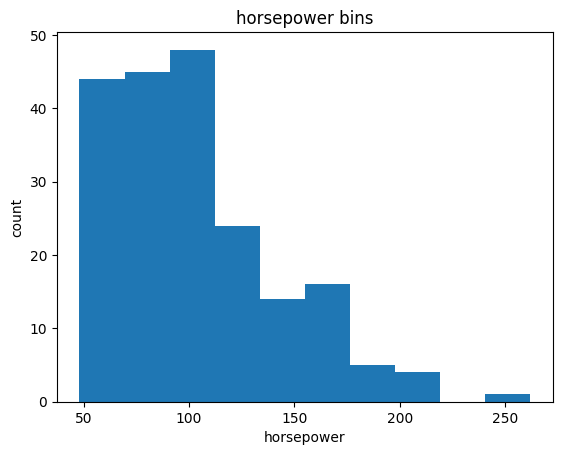

In [33]:
# visulaising the horsepower distribution

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(df['horsepower'])
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

In [34]:
# creating bins

bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [35]:
# creating bins names

group_names = ['Low', 'Medium', 'High']

In [36]:
# cutting the continous variable into categorical bins

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [37]:
# bins distribution

df['horsepower-binned'].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

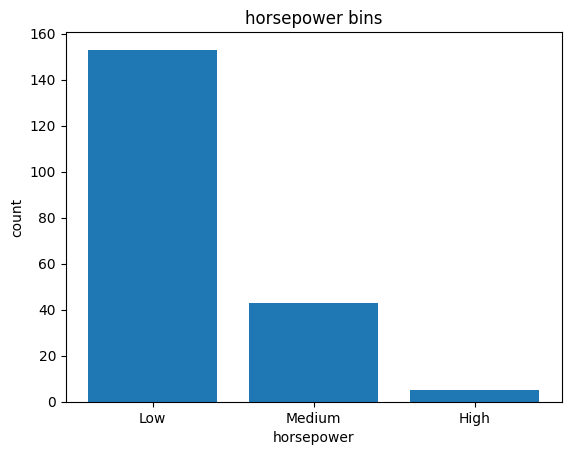

In [38]:
# bins distribution visualization

plt.bar(group_names, df['horsepower-binned'].value_counts())
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('horsepower bins')

In [39]:
# creating dummy variable for fuel type column

dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [40]:
# renaming the column names in dummy_variable

dummy_variable_1.rename(columns={'gas' : 'fuel-type-gas', 'diesel' : 'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [41]:
# merging original dataframe with dummy variable dataframe

df = pd.concat([df, dummy_variable_1], axis=1)

# droping the original fuel type column from 'df'

df.drop('fuel-type', axis=1, inplace=True)

In [42]:
# creating dummy variables for column aspiration and merging with 'df'

dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std' : 'aspiration-std', 'turbo' : 'aspiration-turbo'}, inplace=True)
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis=1, inplace=True)

In [43]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,27,13495.0,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,27,16500.0,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,26,16500.0,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,30,13950.0,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,22,17450.0,Low,False,True,True,False


In [44]:
# saving the new csv file

df.to_csv('clean_car_df.csv')

EXPLORATORY DATA ANALYSIS

In [47]:
# correlation between variables of type 'int64' and 'float64'

df.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,0.066171,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,0.238567,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,0.476153,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,0.657373,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,0.673363,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,0.003811,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,0.785353,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,0.745059,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,0.554610,-0.591309,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,0.036133,-0.034636,0.082269,0.241064,-0.241064,-0.218233,0.218233


In [48]:
import seaborn as sns
%matplotlib inline

(0.0, 53477.82241157219)

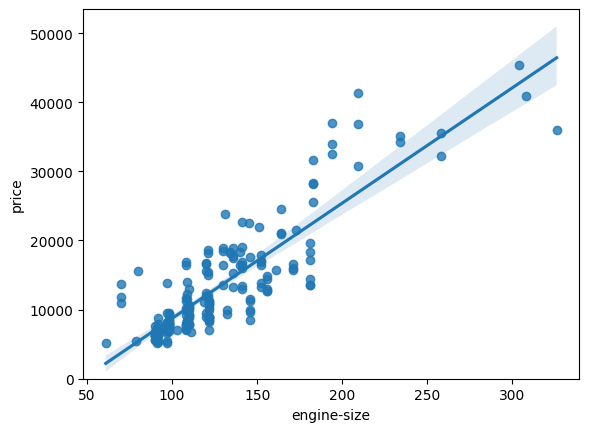

In [49]:
# correlation between continuous numerical variable (positive linear relationship)

sns.regplot(x="engine-size", y='price', data=df)
plt.ylim(0,)

In [50]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

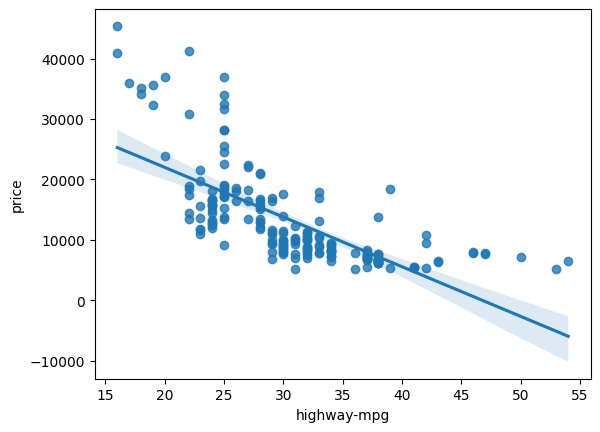

In [51]:
sns.regplot(x='highway-mpg', y='price', data=df)

In [52]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

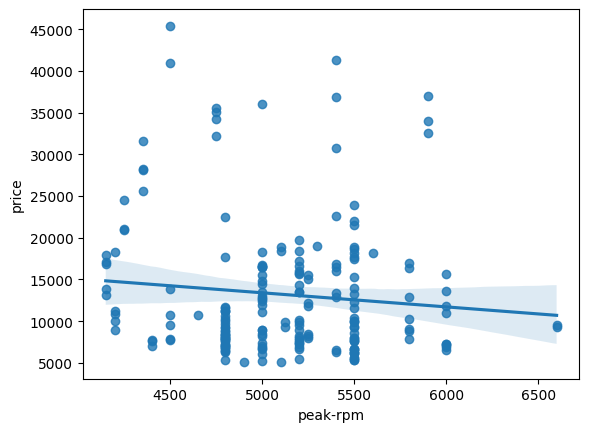

In [53]:
# weak linear relationship

sns.regplot(x='peak-rpm', y='price', data=df)

In [54]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [55]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<Axes: xlabel='stroke', ylabel='price'>

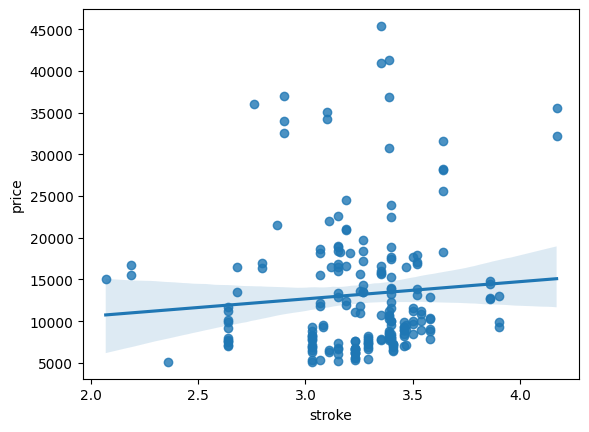

In [56]:
sns.regplot(x='stroke', y='price', data=df)

<Axes: xlabel='body-style', ylabel='price'>

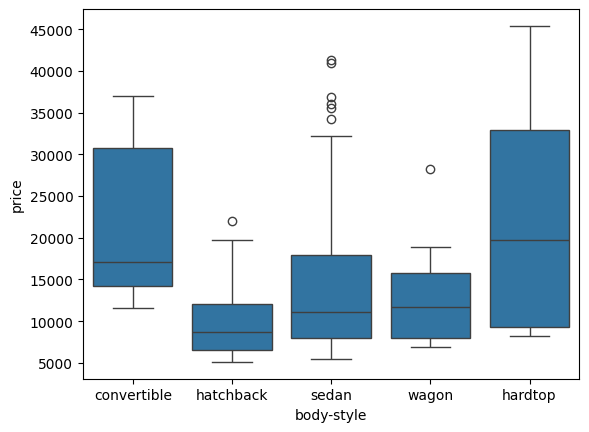

In [57]:
# categorical variables relationship (bad predictor of price)

sns.boxplot(x='body-style', y='price', data=df)

<Axes: xlabel='engine-location', ylabel='price'>

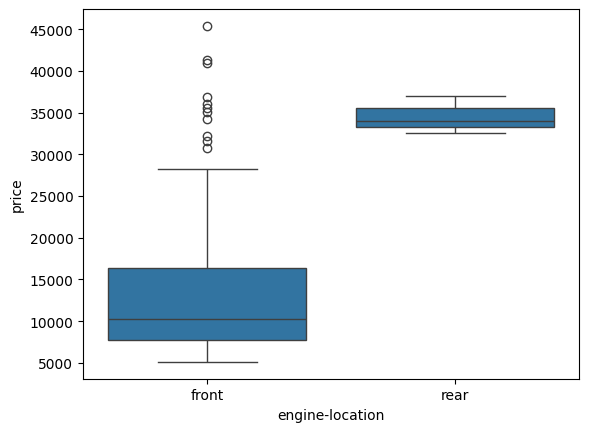

In [58]:
# potential good predictor of price

sns.boxplot(x='engine-location', y='price', data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

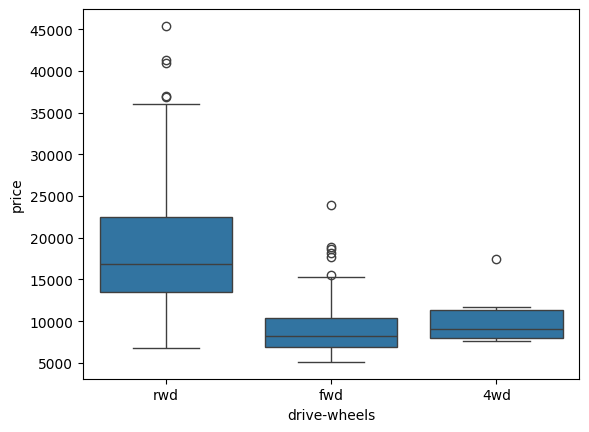

In [59]:
sns.boxplot(x='drive-wheels', y='price', data=df)

In [60]:
# value counts of engine location

engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location' : 'value_counts'}, inplace=True)
engine_loc_counts.index.name = "engine-location"
engine_loc_counts

,count
engine-location,
front,198
rear,3


In [61]:
# value counts of drive wheels 

drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels' : 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [62]:
# grouping drive-wheels and body-style to compare prices

df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [63]:
grouped_test1 = df_group_one.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [64]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [65]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

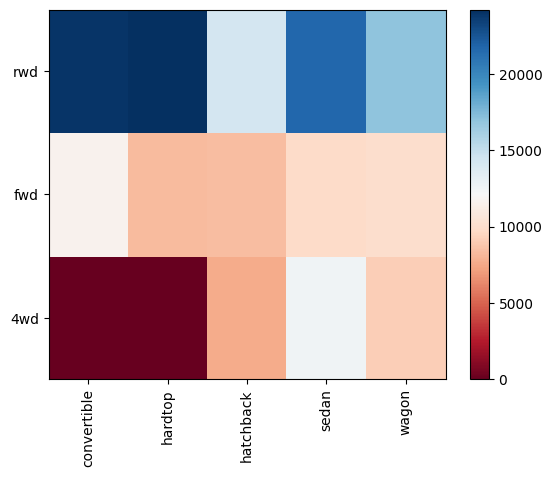

In [66]:
# visualizing the pivot table as heatmap

fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [67]:
from scipy import stats

In [68]:
pearson_coeff, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f"The Pearson Correlation Coefficient is {pearson_coeff} with a P-value of P = {p_value}")

The Pearson Correlation Coefficient is 0.5846418222655081 with a P-value of P = 8.076488270732847e-20


In [69]:
pearson_coeff, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f"The Pearson Correlation Coefficient is {pearson_coeff} with a P-value of P = {p_value}")

The Pearson Correlation Coefficient is 0.8096068016571054 with a P-value of P = 6.273536270650361e-48


MODEL DEVELOPMENT

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
# single linear model

lm = LinearRegression()
lm

LinearRegression()

In [72]:
X = df[['highway-mpg']]
Y = df['price']

In [73]:
# fitting linear regression model

lm.fit(X, Y)

LinearRegression()

In [74]:
# predictions by linear model

Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [75]:
lm.intercept_

np.float64(38423.3058581574)

In [76]:
lm.coef_

array([-821.73337832])

In [77]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [78]:
X = df[['engine-size']]
Y = df['price']

In [79]:
lm1.fit(X, Y)

LinearRegression()

In [80]:
lm1.coef_

array([166.86001569])

In [81]:
lm1.intercept_

np.float64(-7963.338906281024)

In [82]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-L/100km', 'highway-mpg', 'price',
       'horsepower-binned', 'fuel-type-diesel', 'fuel-type-gas',
       'aspiration-std', 'aspiration-turbo'],
      dtype='object')

In [83]:
# multiple linear regression model

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [84]:
lm.fit(Z, df['price'])

LinearRegression()

In [85]:
lm.intercept_

np.float64(-15811.863767729217)

In [86]:
lm.coef_

array([53.53022809,  4.70805253, 81.51280006, 36.1593925 ])

In [87]:
lm2 = LinearRegression()

In [88]:
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

In [89]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [90]:
yhat2 = lm2.predict(df[['normalized-losses', 'highway-mpg']])
yhat2[0:5]

array([16231.78938339, 16231.78938339, 17052.24372355, 13833.33798916,
       20396.97271047])

MODEL EVALUATION USING VISUALIZATION

(0.0, 48174.925922782706)

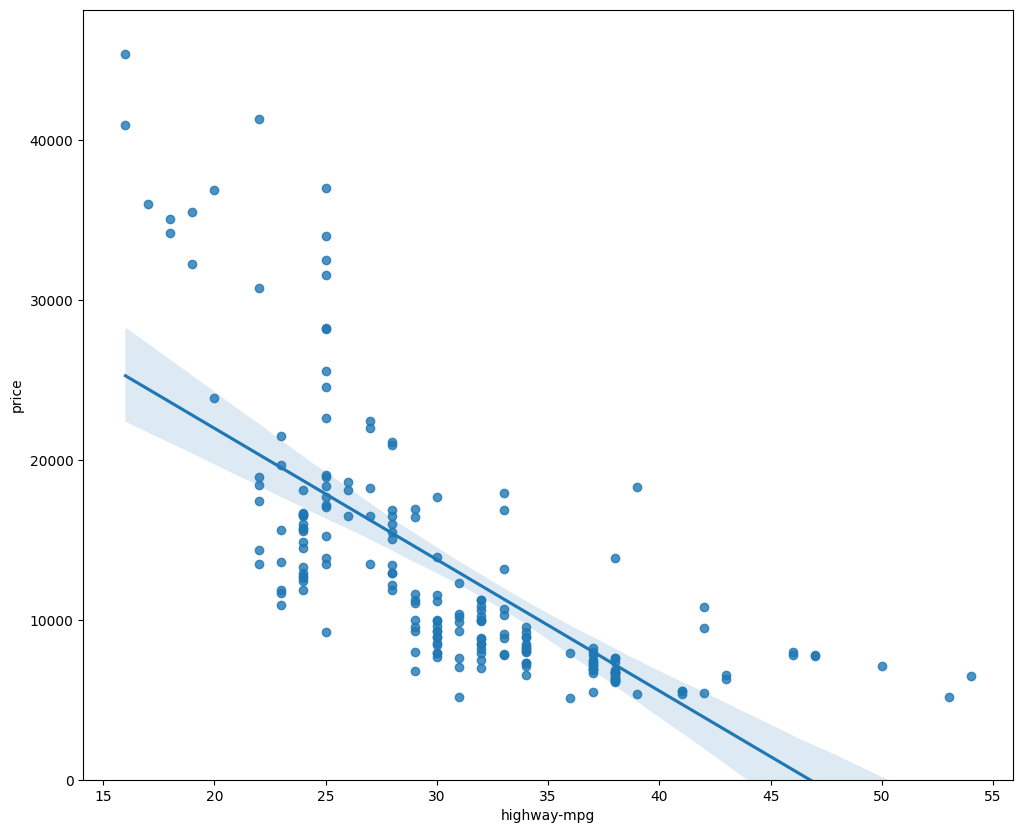

In [91]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

(0.0, 47414.1)

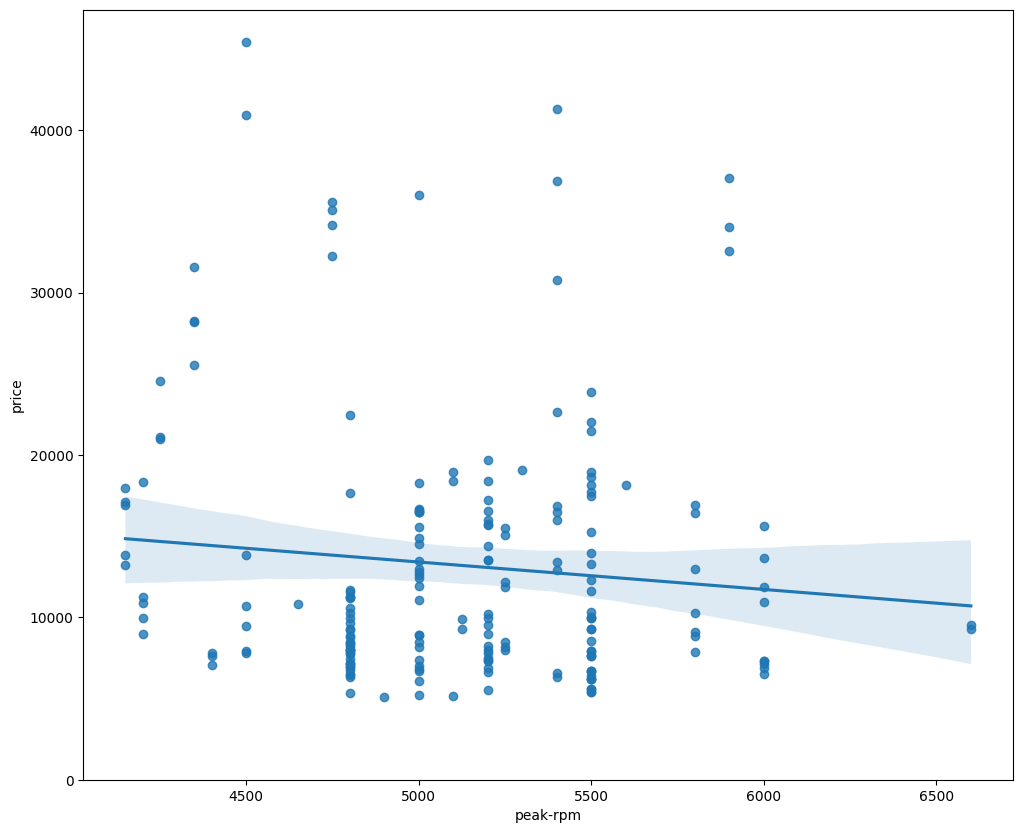

In [92]:
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0.)

In [93]:
df[["peak-rpm",'highway-mpg',"price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


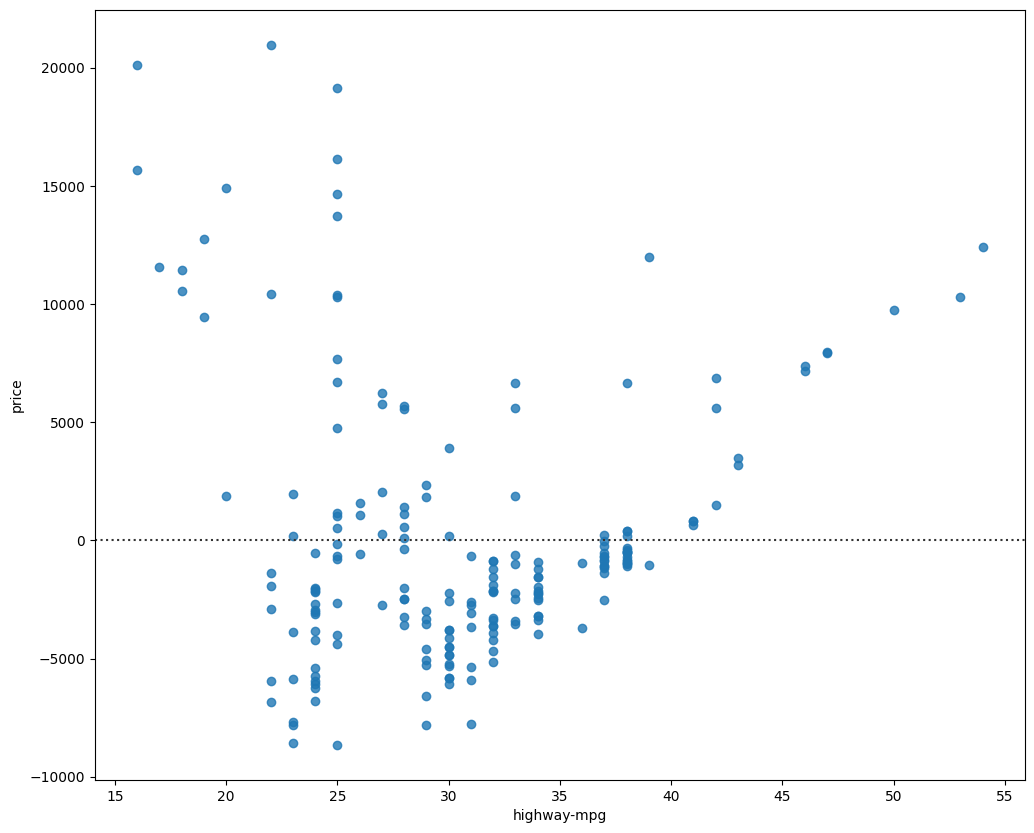

In [94]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

In [95]:
# visualizing multiple linear regression model by comparing fitted values and actual values

Y_hat = lm.predict(Z)

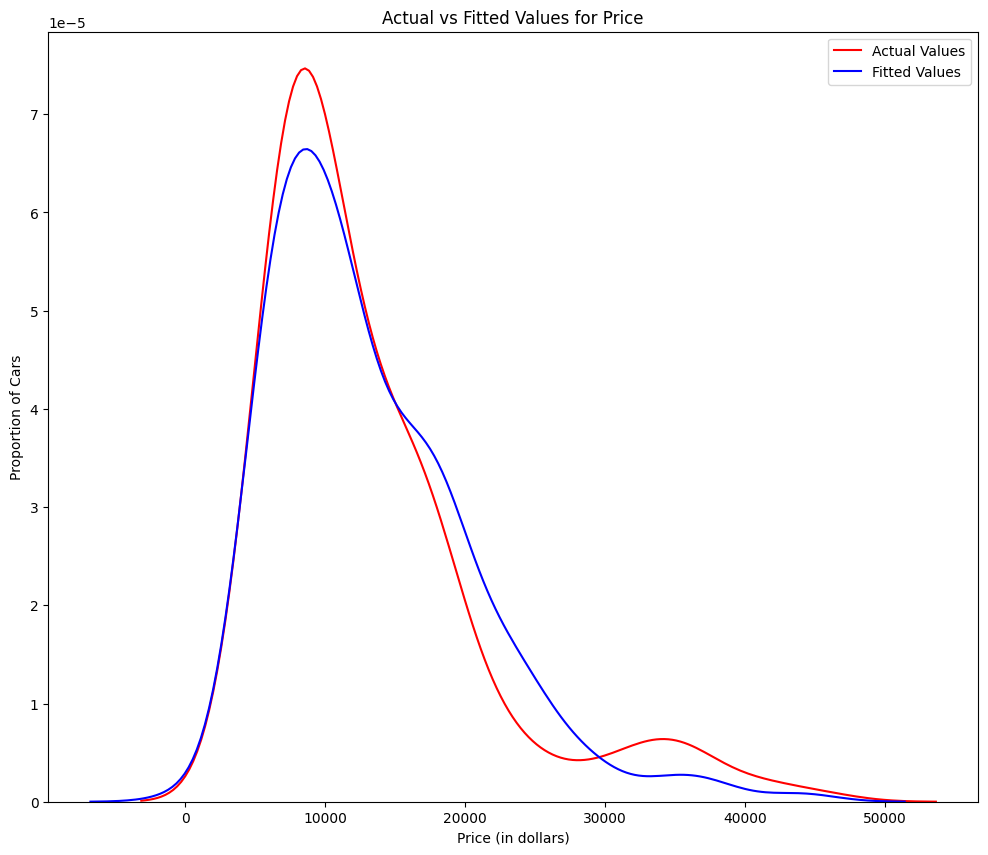

In [96]:
# plotting distplot for actual vs predicted values

plt.figure(figsize=(width, height))


ax1 = sns.kdeplot(df['price'], color="r", label="Actual Values")
sns.kdeplot(Y_hat, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()
plt.show()
plt.close()

In [97]:
# creating a function to plot the data

def PlotPolly(model, independent_variable, dependent_variable, Name):

    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.title('Polynomial Fit')
    
    plt.show()
    plt.close()

In [98]:
x = df['highway-mpg']
y = df['price']

In [99]:
# 3rd degree polynomial on 1 feature

f = np.polyfit(x, y, 4)
p = np.poly1d(f)
print(p)

         4        3       2
0.02651 x - 5.17 x + 382 x - 1.267e+04 x + 1.657e+05


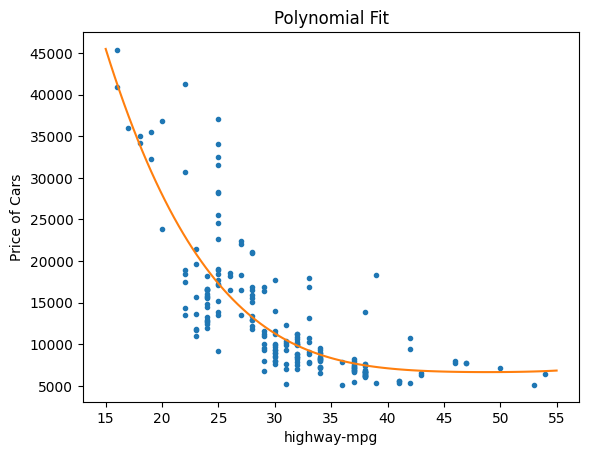

In [100]:
PlotPolly(p, x, y, 'highway-mpg')

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


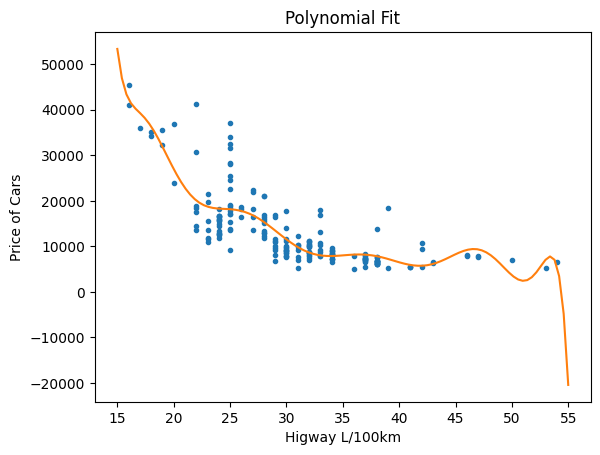

In [101]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'Higway L/100km')

In [102]:
# multivariate polynomial function (2 features)

from sklearn.preprocessing import PolynomialFeatures

In [103]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [104]:
Z_pr = pr.fit_transform(Z)

In [105]:
print(Z.shape)
print(Z_pr.shape)

(201, 4)
(201, 15)


In [148]:
lm_pr = LinearRegression()
lm_pr.fit(Z_pr, df['price'])

LinearRegression()

In [149]:
y_pr = lm_pr.predict(Z_pr)

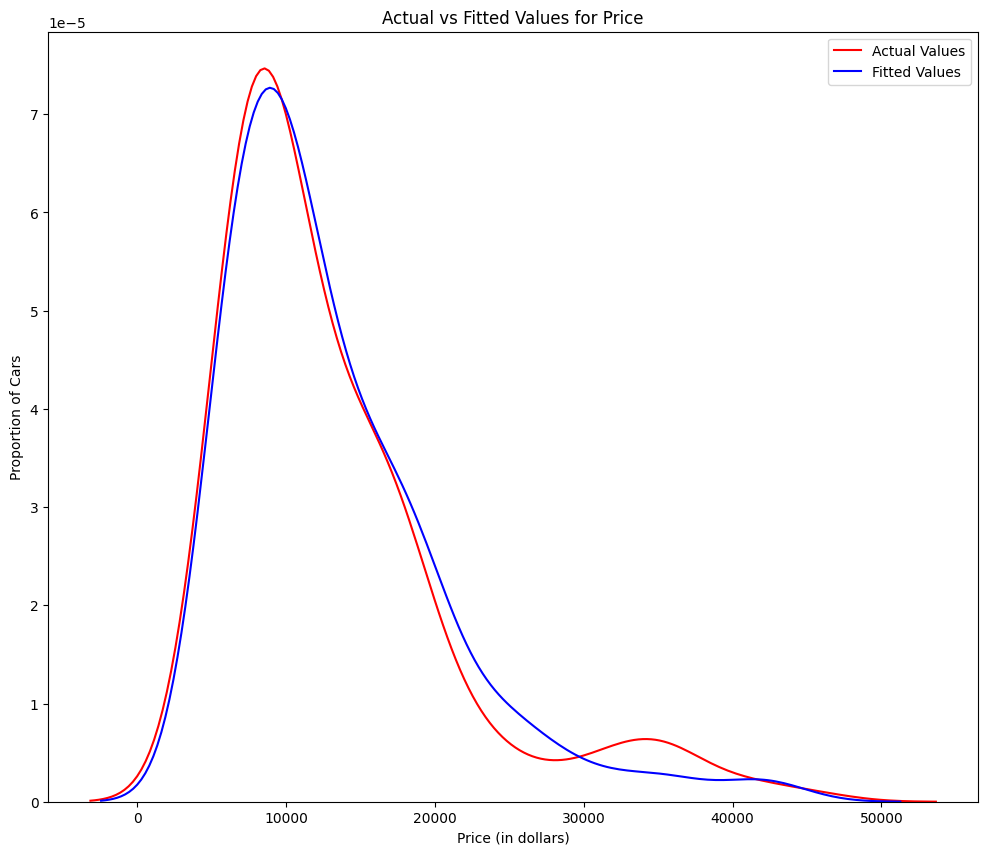

In [150]:
plt.figure(figsize=(width, height))


ax1 = sns.kdeplot(df['price'], color="r", label="Actual Values")
sns.kdeplot(y_pr, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()
plt.show()
plt.close()

Pipeline

In [151]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [152]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [153]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [154]:
Z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [155]:
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955])

In [156]:
Input = [('scale', StandardScaler()), ('model', LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(Z, y)

ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

In [157]:
Y_hat[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

MEASURES FOR IN-SAMPLE EVALUATION

Model 1: Simple Linear Regression

In [158]:
# calculating R^2

# highway_mpg_fit
lm.fit(df[['highway-mpg']], df['price'])

print(f"The r-square is: {lm.score(df[['highway-mpg']], df['price'])}")

The r-square is: 0.4965911884339176


In [159]:
Yhat = lm.predict(df[['highway-mpg']])
print(f"The output of the first four predicted values is: {Yhat[0:4]}")

The output of the first four predicted values is: [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [160]:
from sklearn.metrics import mean_squared_error

In [161]:
# mean sqaured error

mse = mean_squared_error(df['price'], Yhat)
print(f"The mean square error of price and predicted value is: {mse}")

The mean square error of price and predicted value is: 31635042.944639888


Model 2: Multiple Linear Regression

In [162]:
# calculating R^2

lm.fit(Z, df['price'])
print(f"The R-square is: {lm.score(Z, df['price'])}")

The R-square is: 0.8093732522175299


In [163]:
# calculating mse

y_predicted_multifit = lm.predict(Z)
print(f"The mean square error of price and predicted value using multifit is: {mean_squared_error(df['price'], y_predicted_multifit)}")

The mean square error of price and predicted value using multifit is: 11979300.349818882


Model 3: Polynomial Fit

In [164]:
from sklearn.metrics import r2_score

In [165]:
r_squared = r2_score(y, p(x))
print(f"The R-square value is: {r_squared}")

The R-square value is: 0.6748405169870637


In [168]:
print(f"The mean square error for polynomial function is {mean_squared_error(df['price'], p(x))}")

The mean square error for polynomial function is 20433560.105891883


Model 4: Multivariate Polynomial Fit

In [167]:
r_squared = lm_pr.score(Z_pr, df['price'])
print(f"The R-square value is: {r_squared}")

The R-square value is: 0.8463383830281298


In [169]:
print(f"The mean square error for multivariate polynomial function is: {mean_squared_error(df['price'], y_pr)}")

The mean square error for multivariate polynomial function is: 9656350.346203277


<h3>DECISION MAKING<h3>

SLR

R-squared: 0.4965911884339176

MSE: 31635042.944639888

MLR

R-squared: 0.8093732522175299

MSE: 11979300.349818882

Polynomial Fit

R-squared: 0.6748405169870637

MSE: 20433560.105891883

Multivariate Polynomial Fit

R-squared: 0.8463383830281298

MSE: 9656350.346203277

MULTIVARIATE POLYNOMIAL REGRESSION MODEL IS BEST FIT FOR THE DATA.